<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotting-with-cartopy" data-toc-modified-id="Plotting-with-cartopy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting with cartopy</a></span></li><li><span><a href="#projection-and-map-coords-don't-change" data-toc-modified-id="projection-and-map-coords-don't-change-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>projection and map coords don't change</a></span></li><li><span><a href="#keep-palette-the-same" data-toc-modified-id="keep-palette-the-same-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>keep palette the same</a></span></li><li><span><a href="#load-19V-data-from-seaice.ipynb" data-toc-modified-id="load-19V-data-from-seaice.ipynb-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>load 19V data from seaice.ipynb</a></span></li><li><span><a href="#Define-the-dataum-and-the-projections-for-the-EASE-northern-hemisphere-grid" data-toc-modified-id="Define-the-dataum-and-the-projections-for-the-EASE-northern-hemisphere-grid-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Define the dataum and the projections for the EASE northern hemisphere grid</a></span></li><li><span><a href="#Plot-the-map-only----note-you-need-to-create-an-axis-with-the-map-projection-and-call-set_extent" data-toc-modified-id="Plot-the-map-only----note-you-need-to-create-an-axis-with-the-map-projection-and-call-set_extent-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plot the map only -- note you need to create an axis with the map projection and call set_extent</a></span></li><li><span><a href="#Add-the-19V-brightness-temperature-from-seaice.ipynb-using-imshow" data-toc-modified-id="Add-the-19V-brightness-temperature-from-seaice.ipynb-using-imshow-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Add the 19V brightness temperature from seaice.ipynb using imshow</a></span></li><li><span><a href="#Repeat-using-pcolormesh,-which-requires-x-and-y-values-in-the-laea-projection" data-toc-modified-id="Repeat-using-pcolormesh,-which-requires-x-and-y-values-in-the-laea-projection-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Repeat using pcolormesh, which requires x and y values in the laea projection</a></span></li></ul></div>

### Plotting with cartopy


Redo the seaice.ipynb notebook maps using [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) instead of [Basemap](https://github.com/matplotlib/basemap/issues/267#issuecomment-225179958):

    conda install cartopy

(requires save19.npz produced by seaice_II.ipynb)

The main differences between cartopy and basemap are:

1) the way they create plotting axes

Basemap:  create the Basemap instance using bmap=Basemap(...,ax=ax),  redefine [plot and imshow](https://github.com/matplotlib/basemap/blob/master/lib/mpl_toolkits/basemap/__init__.py#L3255-L3283)

Cartopy, create the plotting axis by passing the projection to the axes constructor, which
creates a [geoaxes subclass](https://github.com/SciTools/cartopy/blob/master/lib/cartopy/mpl/geoaxes.py#L222-L234) of the axes class:

    fig, ax = plt.subplots(1, 1, figsize=(10,10),
                       subplot_kw={'projection': projection})
                       
2) the way the set the plot extent

Basemap:  pass the x,y corners of the plot either as lon,lat values for the upper right and lower left corners,
or as a width and height in x,y units

Cartopy:  pass the x,y corners using:

    ax.set_extent(new_extent,projection)
    
or for imshow:

    cs=ax.imshow(temp19V,origin='upper',cmap=cmap,norm=the_norm,
             transform=projection,extent=new_extent,alpha=0.8)


                       
                    

In [1]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import numpy as np
import matplotlib
import cartopy

### projection and map coords don't change

In [2]:
#http://nsidc.org/data/gis/headers/NL.hdr
cornerx=9024309  #meters, from NL.hdr
cornery=cornerx
newcornerx=cornerx/2.
newcornery=newcornerx
new_extent=[-newcornerx,-newcornery,newcornerx,newcornery]
radius=6371228
van_lon,van_lat = [-123.1207,49.2827]

### keep palette the same

In [3]:
globe = ccrs.Globe(ellipse=None, semimajor_axis=radius, 
                   semiminor_axis=radius)
projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90,
                                          central_longitude= -90,globe=globe)
print('pro4_params: ',projection.proj4_params)
#Note that, unlike Basemap, cartopy doesn't add x_0 or y_0 to the projection

pro4_params:  {'a': 6371228, 'b': 6371228, 'proj': 'laea', 'lon_0': -90, 'lat_0': 90, 'x_0': 0.0, 'y_0': 0.0}


### Plot the map only -- note you need to create an axis with the map projection and call set_extent

Also use the Geodetic transform to locate the Vancouver (lon,lat) as a red dot on the laea projection
and add the coastiine, rivers and lakes 

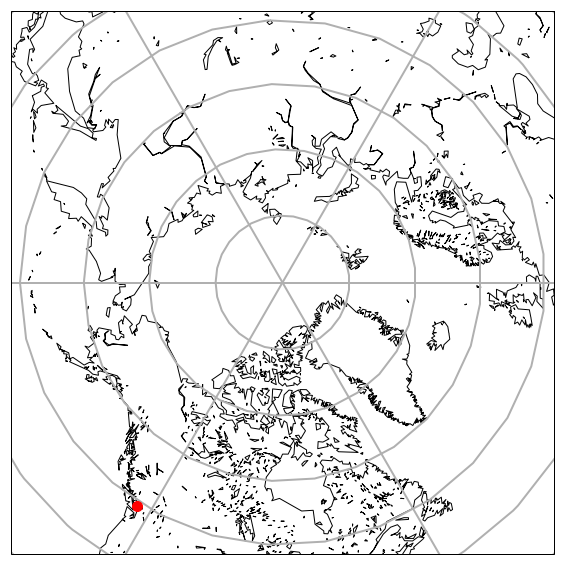

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,10),
                       subplot_kw={'projection': projection})
new_extent=[-newcornerx,newcornerx,-newcornery,newcornery]
ax.set_extent(new_extent,projection)
van_x,van_y=projection.transform_point(van_lon,van_lat,ccrs.Geodetic())
ax.plot(van_x,van_y,'ro',markersize=10);
ax.gridlines(linewidth=2)
ax.add_feature(cartopy.feature.GSHHSFeature(scale='coarse', levels=[1,2,3]));